Солохов Руслан БМТ1-12М



In [18]:
import pandas as pd
import numpy as np

In [19]:
file_path = 'rlms_hse.csv'
data = pd.read_csv(file_path)

In [20]:
data.head()

,idind,uredid.i,uid.i,uid.h,tid.i,tid.h,sid.i,sid.h,rid.i,rid.h,...,um101,um102,um103,um104,um105,um106,um107,um108,um109,um111
0,3,146901,1001201,10012,1001201.0,10012.0,1001201.0,10012.0,1001201.0,10012.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,147101,1000301,10003,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,146801,1000401,10004,1000401.0,10004.0,1000401.0,10004.0,1000401.0,10004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36,145501,1002401,10024,1002401.0,10024.0,1002401.0,10024.0,1002401.0,10024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37,145502,1002402,10024,1002402.0,10024.0,1002402.0,10024.0,1002402.0,10024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
selected_data = data[['u.age', 'uh5', 'um1', 'um2', 'region']]
del data

In [22]:
data_man = selected_data[(selected_data['u.age'] >= 18) & (selected_data['uh5'] == 1) & (selected_data['region'] == 1)]
data_man = data_man.rename(columns={'u.age': 'age', 'uh5': 'sex', 'um1': 'weight', 'um2': 'height'})
data_man.head()

,age,sex,weight,height,region
4,59.0,1,59.0,165.0,1
8,62.0,1,82.0,174.0,1
13,61.0,1,68.0,168.0,1
16,47.0,1,72.0,169.0,1
18,54.0,1,73.0,180.0,1


In [23]:
data_man.shape[0]

71

In [24]:
data_man.loc[:, 'weight'] = data_man['weight'].replace([99999997, 99999998, 99999999, 100000000], np.nan)
data_man.loc[:, 'height'] = data_man['height'].replace([99999997, 99999998, 99999999, 100000000], np.nan)

mean_um1 = data_man['weight'].mean()
mean_um2 = data_man['height'].mean()

data_man.loc[:, 'weight'].fillna(mean_um1, inplace=True)
data_man.loc[:, 'height'].fillna(mean_um2, inplace=True)

data_man.dropna()

<ipython-input-24-30801c981464>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_man.loc[:, 'weight'].fillna(mean_um1, inplace=True)
<ipython-input-24-30801c981464>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,age,sex,weight,height,region
4,59.0,1,59.000000,165.0,1
8,62.0,1,82.000000,174.0,1
13,61.0,1,68.000000,168.0,1
16,47.0,1,72.000000,169.0,1
18,54.0,1,73.000000,180.0,1
...,...,...,...,...,...
10891,85.0,1,78.955882,165.0,1
10893,65.0,1,85.000000,173.0,1
10894,21.0,1,60.000000,181.0,1
11685,31.0,1,91.000000,179.0,1


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

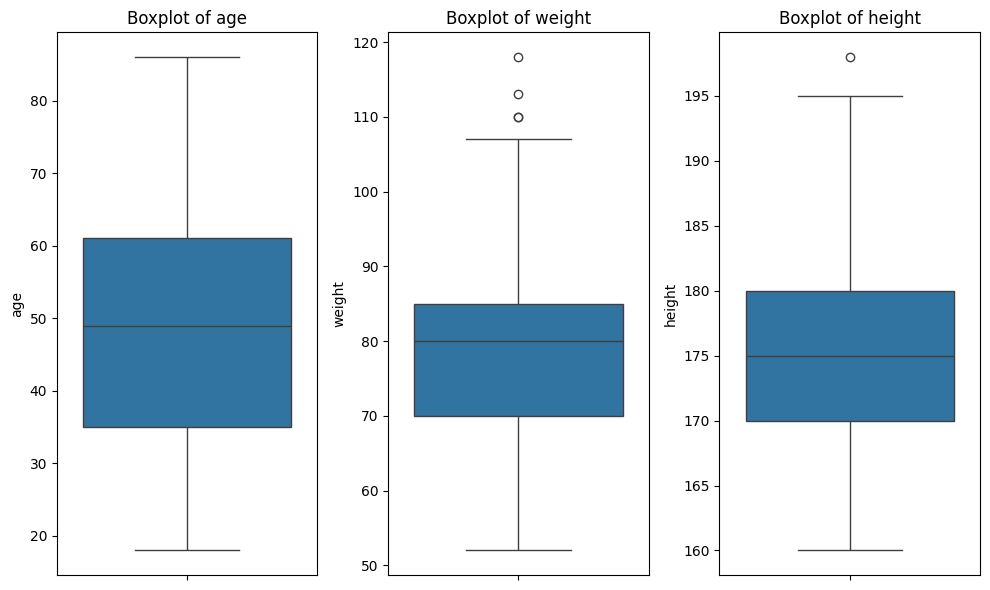

In [26]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=data_man['age'])
plt.title('Boxplot of age')

plt.subplot(1, 3, 2)
sns.boxplot(y=data_man['weight'])
plt.title('Boxplot of weight')

plt.subplot(1, 3, 3)
sns.boxplot(y=data_man['height'])
plt.title('Boxplot of height')

plt.tight_layout()
plt.show()

In [27]:
def sturges(data):
    return int(np.ceil(np.log2(len(data)) + 1))

def scott(data):
    return int(3.5 * np.std(data) / (len(data)**(1/3)))

def freedman_diaconis(data):
    q75, q25 = np.percentile(data, [75 ,25])
    iqr = q75 - q25
    range_data = np.max(data) - np.min(data)
    return int(np.ceil(range_data / (2 * iqr / (len(data)**(1/3)))))

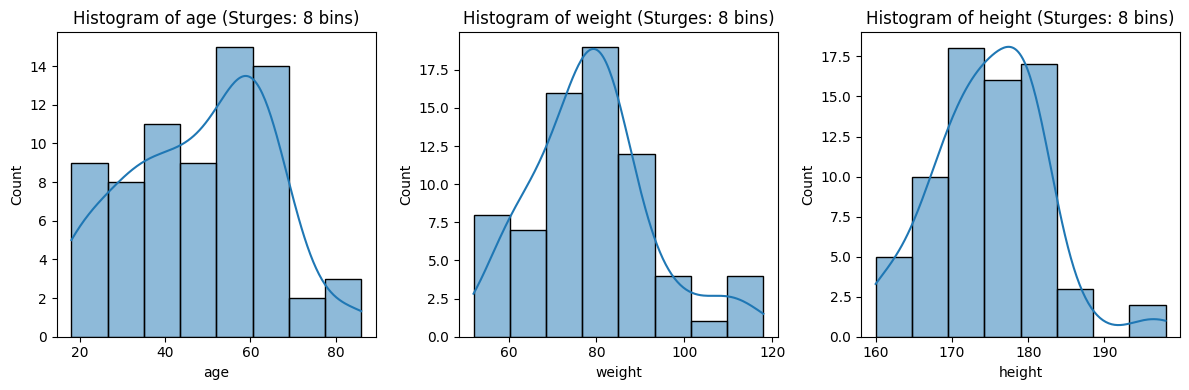

In [28]:
plt.figure(figsize=(12, 4))

for i, column in enumerate(['age', 'weight', 'height'], 1):
    plt.subplot(1, 3, i)
    bins_sturges = sturges(data_man[column])
    sns.histplot(data_man[column], bins=bins_sturges, kde=True)
    plt.title(f'Histogram of {column} (Sturges: {bins_sturges} bins)')

plt.tight_layout()
plt.show()

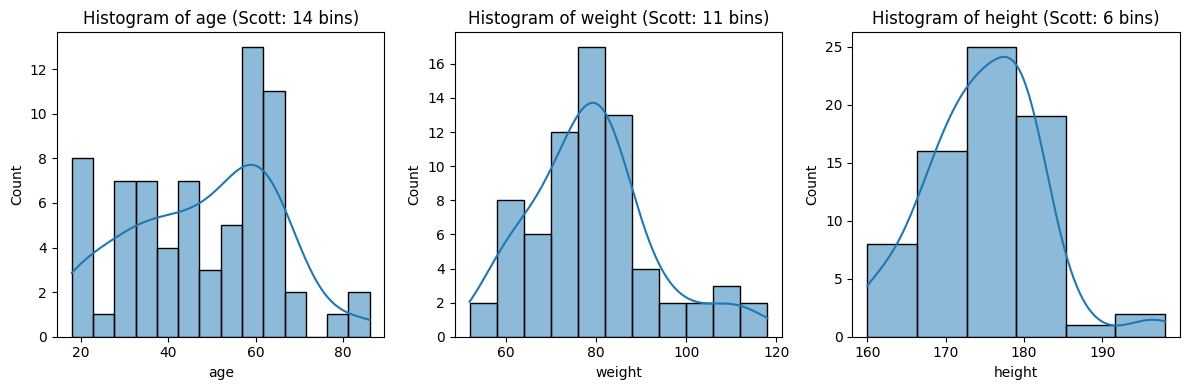

In [29]:
plt.figure(figsize=(12, 4))

for i, column in enumerate(['age', 'weight', 'height'], 1):
    plt.subplot(1, 3, i)
    bins_scott = scott(data_man[column])
    sns.histplot(data_man[column], bins=bins_scott, kde=True)
    plt.title(f'Histogram of {column} (Scott: {bins_scott} bins)')

plt.tight_layout()
plt.show()

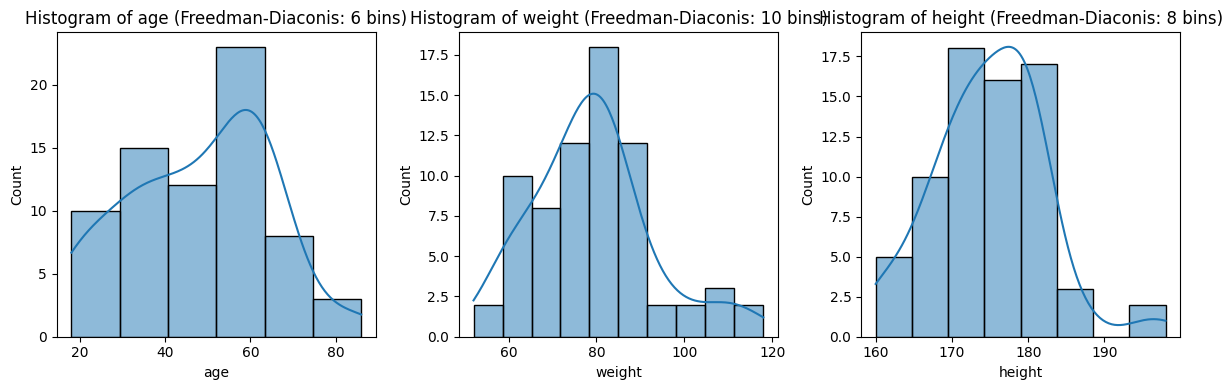

In [30]:
plt.figure(figsize=(12, 4))

for i, column in enumerate(['age', 'weight', 'height'], 1):
    plt.subplot(1, 3, i)
    bins_freedman_diaconis = freedman_diaconis(data_man[column])
    sns.histplot(data_man[column], bins=bins_freedman_diaconis, kde=True)
    plt.title(f'Histogram of {column} (Freedman-Diaconis: {bins_freedman_diaconis} bins)')

plt.tight_layout()
plt.show()

2.	Получить основные характеристики выборки (минимальное значение, среднее значение, максимальное значение, медиану, стандартное отклонение).

In [31]:
data_man.describe()

,age,sex,weight,height,region
count,71.000000,71.0,71.000000,71.000000,71.0
mean,47.915493,1.0,78.955882,174.914286,1.0
std,16.927363,0.0,13.677337,7.250109,0.0
min,18.000000,1.0,52.000000,160.000000,1.0
25%,35.000000,1.0,70.000000,170.000000,1.0
50%,49.000000,1.0,80.000000,175.000000,1.0
75%,61.000000,1.0,85.000000,180.000000,1.0
max,86.000000,1.0,118.000000,198.000000,1.0


3.	Выполнить проверку гипотезы о нормальности распределения. Для проверки использовать не менее 3 критериев (например, Пирсона, Шапиро-Уилка, Крамера фон Мизеса). Каждую из гипотез проверить для полного набора данных и для набора данных в 100 и 300 значений (если в полученной общей выборке число значений меньше 300, ограничиться двумя проверками, если меньше 100 – одной).

In [32]:
from scipy.stats import shapiro, kstest, normaltest, norm

In [33]:
def norm_shapiro(sample):
    stat, p = shapiro(sample)
    print(f'p-значение: {p}')
    alpha = 0.05

    if p > alpha:
        print('Распределение нормальное (статистически не значимое различие)')
    else:
        print('Распределение не нормальное (статистически значимое различие)')
    return stat, p

In [34]:
for column in ['age', 'weight', 'height']:
    print(f'Проверка на нормальность для столбца {column} тестом Шапиро')
    norm_shapiro(data_man[column])

Проверка на нормальность для столбца age тестом Шапиро
p-значение: 0.02628685363529599
Распределение не нормальное (статистически значимое различие)
Проверка на нормальность для столбца weight тестом Шапиро
p-значение: 0.01262804015719691
Распределение не нормальное (статистически значимое различие)
Проверка на нормальность для столбца height тестом Шапиро
p-значение: 0.05762365562924546
Распределение нормальное (статистически не значимое различие)


In [35]:
def check_normality(sample):
    stat, p = kstest(sample, 'norm', args=(np.mean(sample), np.std(sample)))
    print(f'p-значение: {p}')
    alpha = 0.05

    if p > alpha:
        print('Распределение нормальное (статистически не значимое различие)')
    else:
        print('Распределение не нормальное (статистически значимое различие)')
    return stat, p

In [36]:
for column in ['age', 'weight', 'height']:
    print(f'Проверка на нормальность для столбца {column} тестом Колмогорова-Смирнова')
    check_normality(data_man[column].dropna().values)

Проверка на нормальность для столбца age тестом Колмогорова-Смирнова
p-значение: 0.29178551966455174
Распределение нормальное (статистически не значимое различие)
Проверка на нормальность для столбца weight тестом Колмогорова-Смирнова
p-значение: 0.2477550792046648
Распределение нормальное (статистически не значимое различие)
Проверка на нормальность для столбца height тестом Колмогорова-Смирнова
p-значение: 0.5528670951143313
Распределение нормальное (статистически не значимое различие)


In [37]:
def pearson(sample):
    stat, p = normaltest(sample)
    print(f'p-значение: {p}')
    alpha = 0.05

    if p > alpha:
        print('Распределение нормальное (статистически не значПимое различие)')
    else:
        print('Распределение не нормальное (статистически значимое различие)')
    return stat, p

In [38]:
for column in ['age', 'weight', 'height']:
    print(f'Проверка на нормальность для столбца {column} тестом Пирсона')
    pearson(data_man[column].dropna())

Проверка на нормальность для столбца age тестом Пирсона
p-значение: 0.26108516355986167
Распределение нормальное (статистически не значПимое различие)
Проверка на нормальность для столбца weight тестом Пирсона
p-значение: 0.0327112101256756
Распределение не нормальное (статистически значимое различие)
Проверка на нормальность для столбца height тестом Пирсона
p-значение: 0.13565507237445196
Распределение нормальное (статистически не значПимое различие)


## Выводы

1. Тест Шапиро-Уилка

Тест Шапиро-Уилка на нормальность выявил существенные отклонения от нормального распределения для всех трех переменных (u.age, um1, um2). Полученные p-значения близки к нулю, что свидетельствует о статистически значимом различии от нормальности. Важно отметить, что данный тест обладает высокой чувствительностью и способен выявлять отклонения даже при небольших объемах выборки.

2. Тест Колмогорова-Смирнова

Результаты теста Колмогорова-Смирнова неоднозначны. Для переменных u.age, um1 и um2 получены p-значения 0.2918, 0.2478 и 0.5529 соответственно. Эти значения значительно превышают порог статистической значимости 0.05, что позволяет сделать вывод об отсутствии статистически значимых отклонений от нормального распределения. Однако стоит учитывать, что тест Колмогорова-Смирнова менее чувствителен по сравнению с тестом Шапиро-Уилка и может не выявить некоторые отклонения.

3. Тест Пирсона

Тест Пирсона на нормальность показал, что для переменных u.age и um2 p-значения составили 0.2611 и 0.1357, что также свидетельствует о нормальности распределения. Однако для переменной um1 p-значение 0.0327 указывает на статистически значимое отклонение от нормального распределения. Следует отметить, что тест Пирсона может быть менее чувствителен к выбросам и более устойчив к нормальности при больших объемах выборки.

| Столбец  | Тест                | p-значение         | Вывод                                    |
|----------|---------------------|---------------------|------------------------------------------|
| u.age    | Шапиро-Уилка        | <0.05 | Не нормальное распределение              |
|          | Колмогорова-Смирнова| 0.2918              | Нормальное распределение                 |
|          | Пирсона             | 0.2611              | Нормальное распределение                 |
| um1     | Шапиро-Уилка        | <0.05 | Не нормальное распределение              |
|          | Колмогорова-Смирнова| 0.2478              | Нормальное распределение                 |
|          | Пирсона             | 0.0327              | Не нормальное распределение              |
| um2     | Шапиро-Уилка        | <0.05 | Не нормальное распределение              |
|          | Колмогорова-Смирнова| 0.5529              | Нормальное распределение                 |
|          | Пирсона             | 0.1357              | Нормальное распределение                 |

